# Logistic Regression YT

#### Importación de librerías [General]

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None   #Despliegue de todas las columnas

#### Traer el dataset

In [51]:
data = pd.read_csv(r'F:/BD/CSV/Gentera/Cierre/CierreMensual_Log_Regres.txt', 
                  encoding = 'ISO-8859-1', sep = '\t')

## Data discovery

#### Presentación de todos los campos del dataset

In [52]:
# Mora es 1, cuando existe saldo mayor a 30
data.head(1)

,fechaObservacion,Id_Sucursal,Idpersona,IdOportunidad,OS,Numero_Nomina_Actual,CicloPersonaCI,FechaInicio,NoCuenta,FechaCreacionOportunidad,Frecuencia_Pago,Tiene_Credianticipo,producto,NivelDeRiesgo,TipoSolicitante,Ano_Corte,Mes_Corte,DelMes,Clase,Tiene_Aval,Requiere_Aval,Cumplimiento_Politica_Aval,Rango_Monto_Actual,Incremento_MontoAnterior,Cumplimiento_Politica_Monto,Plazo,TasaInteres,Rango_Plazo,Rango_Edad,montoprestado,saldo,Saldo_8_90,Saldo_30mas,DiasAtraso,Max_Dias_Atraso,MontoPrestadoAnterior,Saldo_8_60,Mora
0,31/12/2018,3,2488881,13725278,LAZARO CARDENAS,75779,3,14/05/2018,134619719,24/04/2018,Mensual,NO_Credianticipo,CRÉDITO INDIVIDUAL,Excelente,Subsecuente,2018,12,0,Subsecuente,SI,NO,No Cumple Politica: Si pide Aval,"20,000-24,999",Incremento_Menor_a_1000,Cumple Politica Monto,12.0,77.61,9 a 12 meses,40-49,21045.15,12771.07,12771.07,0.0,17,33,20789.92,12771.07,0


#### Histograma de distribución 

Text(0, 0.5, 'Si tiene mora = 1')

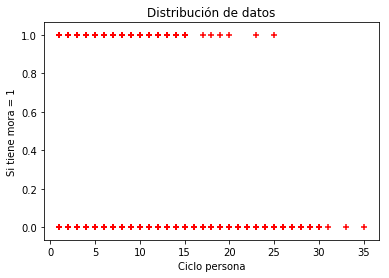

In [53]:
plt.scatter(data.CicloPersonaCI, data.Mora, marker = '+', color= 'red')
plt.title('Distribución de datos')
plt.xlabel('Ciclo persona')
plt.ylabel('Si tiene mora = 1')

#### Agrupadores con operadores

In [54]:
data.groupby('Mora').mean()

,Id_Sucursal,Idpersona,IdOportunidad,Numero_Nomina_Actual,CicloPersonaCI,NoCuenta,Ano_Corte,Mes_Corte,DelMes,Plazo,TasaInteres,montoprestado,saldo,Saldo_8_90,Saldo_30mas,DiasAtraso,Max_Dias_Atraso,MontoPrestadoAnterior,Saldo_8_60
Mora,,,,,,,,,,,,,,,,,,,
0,2.475465e+06,4.311778e+07,1.803517e+07,54540.589109,3.243822,1.364684e+08,2018.0,12.0,0.095812,11.544120,73.823418,32691.128373,21896.809182,359.586998,0.00000,0.468002,2.272491,22610.125199,359.586998
1,2.645746e+06,4.912785e+07,1.513269e+07,20587.155414,2.254528,1.317989e+08,2018.0,12.0,0.000000,11.581596,77.349466,28792.893058,13646.879580,5255.288799,13646.87958,113.697483,113.424684,22080.263283,2712.263582


Es más probable que caiga en mora, alguien que tuvo un préstamo promedio de $28,792

### Probabilidad de que un cliente caiga en mora

#### Contribución de clientes por mora (0 = sin mora, 1 = mora)

In [55]:
data['Mora'].value_counts()

0    113743
1     12753
Name: Mora, dtype: int64

In [56]:
prob = 12753 / 113743
print(round((prob * 100),1),  '%')

11.2 %


#### Agrupador por nivel de riesgo

In [57]:
data.groupby('NivelDeRiesgo').mean()

,Id_Sucursal,Idpersona,IdOportunidad,Numero_Nomina_Actual,CicloPersonaCI,NoCuenta,Ano_Corte,Mes_Corte,DelMes,Plazo,TasaInteres,montoprestado,saldo,Saldo_8_90,Saldo_30mas,DiasAtraso,Max_Dias_Atraso,MontoPrestadoAnterior,Saldo_8_60,Mora
NivelDeRiesgo,,,,,,,,,,,,,,,,,,,,
?,8.902124e+06,4.876786e+07,1.024094e+08,52749.166667,1.500000,1.328915e+08,2018.0,12.0,0.000000,11.950000,83.750000,21266.245833,7032.337500,1040.860833,2198.775000,17.000000,18.000000,20345.999083,0.000000,0.166667
Bueno,2.524928e+06,4.705484e+07,1.763811e+07,50909.564041,2.694508,1.359253e+08,2018.0,12.0,0.083726,11.535648,74.970128,30637.105741,19842.830638,920.413240,1545.060245,13.681606,15.291167,22473.446038,629.594872,0.116162
Excelente,2.410129e+06,4.044719e+07,1.819699e+07,51976.367926,3.630937,1.362717e+08,2018.0,12.0,0.093928,11.510238,72.834384,35550.294994,23651.348391,548.162237,872.964495,6.918367,7.954551,22671.072068,385.897372,0.058899
Malo,5.206132e+06,4.566258e+07,5.826287e+07,55511.625000,1.750000,1.354303e+08,2018.0,12.0,0.187500,10.587500,77.830000,29981.081250,16743.870625,112.646875,938.781250,17.812500,18.500000,25175.178125,0.000000,0.125000
Regular,2.601401e+06,4.400740e+07,1.686820e+07,49638.998275,3.008542,1.355421e+08,2018.0,12.0,0.073929,11.657923,75.496824,28569.967505,17896.926334,1389.867020,2137.474822,19.130312,21.937095,22475.153179,997.031042,0.161660
Sin Cálculo,1.190430e+07,5.973230e+06,1.029563e+08,73740.000000,4.250000,1.384438e+08,2018.0,12.0,0.250000,10.300000,70.000000,35464.892500,26287.590000,0.000000,0.000000,0.000000,1.750000,32992.915425,0.000000,0.000000


#### Histograma de las edades

Text(0, 0.5, 'Clientes')

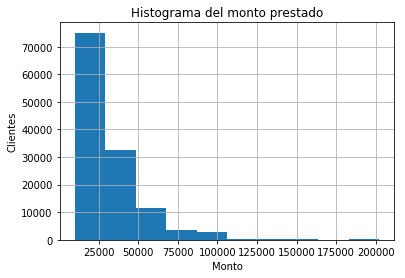

In [58]:
# Histograma de las edades

%matplotlib inline
data.montoprestado.hist()
plt.title("Histograma del monto prestado")
plt.xlabel("Monto")
plt.ylabel("Clientes")

#### Tipos de datos

In [59]:
data.dtypes.head()

fechaObservacion    object
Id_Sucursal          int64
Idpersona            int64
IdOportunidad        int64
OS                  object
dtype: object

#### Columnas del dataset original

In [60]:
data.columns

Index(['fechaObservacion', 'Id_Sucursal', 'Idpersona', 'IdOportunidad', 'OS',
       'Numero_Nomina_Actual', 'CicloPersonaCI', 'FechaInicio', 'NoCuenta',
       'FechaCreacionOportunidad', 'Frecuencia_Pago', 'Tiene_Credianticipo',
       'producto', 'NivelDeRiesgo', 'TipoSolicitante', 'Ano_Corte',
       'Mes_Corte', 'DelMes', 'Clase', 'Tiene_Aval', 'Requiere_Aval',
       'Cumplimiento_Politica_Aval', 'Rango_Monto_Actual',
       'Incremento_MontoAnterior', 'Cumplimiento_Politica_Monto', 'Plazo',
       'TasaInteres', 'Rango_Plazo', 'Rango_Edad', 'montoprestado', 'saldo',
       'Saldo_8_90', 'Saldo_30mas', 'DiasAtraso', 'Max_Dias_Atraso',
       'MontoPrestadoAnterior', 'Saldo_8_60', 'Mora'],
      dtype='object')

#### Selección de algunas variables para la prueba

In [61]:
data_s = data[['Id_Sucursal', 'NivelDeRiesgo', 'Tiene_Aval','Clase', 'montoprestado', 
               'Frecuencia_Pago','TasaInteres','Mora']]

In [62]:
data_s.columns

Index(['Id_Sucursal', 'NivelDeRiesgo', 'Tiene_Aval', 'Clase', 'montoprestado',
       'Frecuencia_Pago', 'TasaInteres', 'Mora'],
      dtype='object')

## Construcción de variables dummy

In [63]:
cat_vars=[ 'NivelDeRiesgo', 'Tiene_Aval', 'Clase', 'Frecuencia_Pago']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_s[var], prefix=var)
    data1=data_s.join(cat_list) 
    data_s = data1

#### Dataset incluyendo las variables dummy

In [64]:
data_s.head()

,Id_Sucursal,NivelDeRiesgo,Tiene_Aval,Clase,montoprestado,Frecuencia_Pago,TasaInteres,Mora,NivelDeRiesgo_?,NivelDeRiesgo_Bueno,NivelDeRiesgo_Excelente,NivelDeRiesgo_Malo,NivelDeRiesgo_Regular,NivelDeRiesgo_Sin Cálculo,Tiene_Aval_NO,Tiene_Aval_SI,Clase_Nuevo,Clase_Subsecuente,Frecuencia_Pago_Bisemanal,Frecuencia_Pago_Mensual
0,3,Excelente,SI,Subsecuente,21045.15,Mensual,77.61,0,0,0,1,0,0,0,0,1,0,1,0,1
1,3,Excelente,SI,Nuevo,21045.15,Mensual,77.61,0,0,0,1,0,0,0,0,1,1,0,0,1
2,3,Bueno,SI,Subsecuente,25595.88,Mensual,72.56,0,0,1,0,0,0,0,0,1,0,1,0,1
3,3,Bueno,NO,Nuevo,10698.65,Mensual,110.58,0,0,1,0,0,0,0,1,0,1,0,0,1
4,3,Regular,SI,Subsecuente,60009.38,Mensual,64.04,0,0,0,0,0,1,0,0,1,0,1,0,1


#### Eliminar las variables categóricas (se sustituyen por las dummy)

In [65]:
cat_vars=[ 'NivelDeRiesgo', 'Tiene_Aval', 'Clase', 'Frecuencia_Pago']
data_vars= data_s.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [66]:
# Our final data columns will be:
data_final=data_s[to_keep]
print(data_final.columns.values)
print(len(data_final.columns.values))

['Id_Sucursal' 'montoprestado' 'TasaInteres' 'Mora' 'NivelDeRiesgo_?'
 'NivelDeRiesgo_Bueno' 'NivelDeRiesgo_Excelente' 'NivelDeRiesgo_Malo'
 'NivelDeRiesgo_Regular' 'NivelDeRiesgo_Sin Cálculo' 'Tiene_Aval_NO'
 'Tiene_Aval_SI' 'Clase_Nuevo' 'Clase_Subsecuente'
 'Frecuencia_Pago_Bisemanal' 'Frecuencia_Pago_Mensual']
16


## Selección de rasgos para el modelo

#### Importación de librerías

In [67]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Definir variables predictoras (X)  y variable a predecir (Y)

In [68]:
use_data_vars = data_final.columns.values.tolist()

Y = ['Mora']
X = [v for v in use_data_vars if v not in Y]

#### Definir cantidad de variables a utilizar para el modelo

In [69]:
n = 10

#### Ejecutar paquete de regresión logística

In [70]:
lr = LogisticRegression(solver = 'lbfgs')

#### Correr regresión logística

In [71]:
rfe = RFE(lr, n)
rfe = rfe.fit(data_final[X], data_final[Y].values.ravel())

#### Identificar variables recomendadas por el modelo (usar True)

In [72]:
print(rfe.support_)

[ True  True  True False  True  True False False False  True  True  True
  True False  True]


#### Ranking de variables predictoras [las mejores son las 1, empeoran a medida que se alejan]

In [73]:
print(rfe.ranking_)

[1 1 1 5 1 1 4 2 6 1 1 1 1 3 1]


#### Listar variables predictoras (combinar con ranking y soporte)

In [74]:
z=zip(data_final,rfe.support_, rfe.ranking_)
list(z)

[('Id_Sucursal', True, 1),
 ('montoprestado', True, 1),
 ('TasaInteres', True, 1),
 ('Mora', False, 5),
 ('NivelDeRiesgo_?', True, 1),
 ('NivelDeRiesgo_Bueno', True, 1),
 ('NivelDeRiesgo_Excelente', False, 4),
 ('NivelDeRiesgo_Malo', False, 2),
 ('NivelDeRiesgo_Regular', False, 6),
 ('NivelDeRiesgo_Sin Cálculo', True, 1),
 ('Tiene_Aval_NO', True, 1),
 ('Tiene_Aval_SI', True, 1),
 ('Clase_Nuevo', True, 1),
 ('Clase_Subsecuente', False, 3),
 ('Frecuencia_Pago_Bisemanal', True, 1)]

#### Variables predictoras seleccionadas (cols)

In [75]:
cols = ['Id_Sucursal', 'montoprestado', 'TasaInteres',
        'NivelDeRiesgo_?', 'NivelDeRiesgo_Bueno', 'NivelDeRiesgo_Sin Cálculo', 
        'Tiene_Aval_NO', 'Tiene_Aval_SI','Clase_Nuevo',
         'Frecuencia_Pago_Bisemanal']

#### Variables finales para modelo

In [76]:
X = data_final[cols]
Y = data_final['Mora']

## Implementación del modelo con statsmodel

In [77]:
# Importación de la librería
import statsmodels.api as sm

In [78]:
# Correr modelo para calcular parámetros
logit_model = sm.Logit(Y, X)

# Resultado de la ejecución del modelo
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.303384
         Iterations 14


#### Parámetros de la regresión logística

Cuanto más pequeño es el P valor, las variables son mejores y más significativas (P<z|z|)

* Las variables en las cuales el "p-value"  no sea menor a 0.05, deberán ser removidas.

In [79]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                   Results: Logit
====================================================================================================================
Model:                               Logit                             Pseudo R-squared:                  0.072     
Dependent Variable:                  Mora                              AIC:                               76773.6231
Date:                                2019-02-26 20:36                  BIC:                               76871.1028
No. Observations:                    126496                            Log-Likelihood:                    -38377.   
Df Model:                            9                                 LL-Null:                           -41348.   
Df Residuals:                        126486                            LLR p-value:                       0.0000    
Converged:                           1.0000                            Scale:                             1.0000    
No. Iterations:                      14.0000                                                                        
--------------------------------------------------------------------------------------------------------------------
                           Coef.         Std.Err.          z     P>|z|          [0.025                 0.975]       
--------------------------------------------------------------------------------------------------------------------
Id_Sucursal                 0.0000               0.0000   2.2097 0.0271                 0.0000                0.0000
montoprestado               0.0000               0.0000  10.7862 0.0000                 0.0000                0.0000
TasaInteres                 0.0431               0.0013  33.0620 0.0000                 0.0406                0.0457
NivelDeRiesgo_?             1.1244               0.7760   1.4489 0.1474                -0.3966                2.6453
NivelDeRiesgo_Bueno         0.1759               0.0197   8.9175 0.0000                 0.1372                0.2146
NivelDeRiesgo_Sin Cálculo -67.1924 750303382612747.7500  -0.0000 1.0000 -1470567607399629.0000 1470567607399494.5000
Tiene_Aval_NO              -6.8290               0.1111 -61.4469 0.0000                -7.0468               -6.6111
Tiene_Aval_SI              -5.4990               0.1092 -50.3482 0.0000                -5.7130               -5.2849
Clase_Nuevo                 0.3355               0.0213  15.7789 0.0000                 0.2939                0.3772
Frecuencia_Pago_Bisemanal  -0.2926               0.0574  -5.0962 0.0000                -0.4052               -0.1801
====================================================================================================================

"""

#### Eliminación de variables en las que el "P-valor" es menor a 0.05

In [80]:
X.columns

Index(['Id_Sucursal', 'montoprestado', 'TasaInteres', 'NivelDeRiesgo_?',
       'NivelDeRiesgo_Bueno', 'NivelDeRiesgo_Sin Cálculo', 'Tiene_Aval_NO',
       'Tiene_Aval_SI', 'Clase_Nuevo', 'Frecuencia_Pago_Bisemanal'],
      dtype='object')

## Modelo logístico ajustado

In [81]:
# Selección de variables significativas

cols=['Id_Sucursal', 'montoprestado', 'TasaInteres',
       'NivelDeRiesgo_Bueno','Tiene_Aval_NO',
       'Tiene_Aval_SI', 'Clase_Nuevo', 'Frecuencia_Pago_Bisemanal'] 

# Construcción del nuevo data set con las variables más significativas
X=data_final[cols]
y=data_final['Mora']

# Correr el modelo logístico
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.303392
         Iterations 7
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.072     
Dependent Variable:    Mora                AIC:                 76771.7692
Date:                  2019-02-26 20:36    BIC:                 76849.7529
No. Observations:      126496              Log-Likelihood:      -38378.   
Df Model:              7                   LL-Null:             -41348.   
Df Residuals:          126488              LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Id_Sucursal                0

## Logistic Regression Model Fitting

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [102]:
# Definir tamaño del set de entrenamiento y del set test (para este caso se usa 0.4 para el test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
# Bondad de ajuste de r cuadrada
y_pred = logreg.predict(X_test)
print('Precisión de la regresión logística (r cuadrada) en el "test set": {:.2f}'.format(logreg.score(X_test, y_test)))

Precisión de la regresión logística (r cuadrada) en el "test set": 0.90


In [105]:
# Validación (solo restar a 1, la media de Y - variable a predecir)
1-Y.mean()

0.8991825828484695

### Cálculo de coeficientes para modelo

In [109]:
logreg.coef_

array([[-1.56412786e-08, -7.17691858e-05, -1.58641815e-07,
        -8.12106956e-10, -9.82595011e-10, -1.18752364e-09,
        -5.40647761e-10, -1.07045155e-10]])

In [113]:
pd.DataFrame(list(zip(X.columns, np.transpose(logreg.coef_))), columns = ['Variable_pred','Coeficiente'])

,Variable_pred,Coeficiente
0,Id_Sucursal,[-1.5641278574033874e-08]
1,montoprestado,[-7.17691858221627e-05]
2,TasaInteres,[-1.5864181483780316e-07]
3,NivelDeRiesgo_Bueno,[-8.121069559834904e-10]
4,Tiene_Aval_NO,[-9.825950114902494e-10]
5,Tiene_Aval_SI,[-1.1875236355357535e-09]
6,Clase_Nuevo,[-5.406477614876803e-10]
7,Frecuencia_Pago_Bisemanal,[-1.0704515472409633e-10]


In [137]:
probabilidad =  ((-1.5641278574033874e-08)    * (1)      +         # Id_Sucursal
                (-7.17691858221627e-05)      * (13000)    +         # Monto prestado
                (-1.5864181483780316e-07)    * (30.5)     +          # Tasa interés
                (-8.121069559834904e-10)     *  (0)       +           # Nivel de riesgo
                (-9.825950114902494e-10)     *  (1)       +           # No Aval
                (-1.1875236355357535e-09)    *  (0)       +           # Si Aval
                (-5.406477614876803e-10)     *  (1)       +           # Cliente nuevo
                (-1.0704515472409633e-10)    *  (1) )                  # Pago bisemanal

probabilidad

-0.9330042715350342

In [138]:
from IPython.display import display, Math, Latex
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [139]:
probs = logreg.predict_proba(X_test)
probs

array([[0.9887367 , 0.0112633 ],
       [0.90545111, 0.09454889],
       [0.82122171, 0.17877829],
       ...,
       [0.92643081, 0.07356919],
       [0.81421882, 0.18578118],
       [0.99146383, 0.00853617]])

In [129]:
prediction = logreg.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [142]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1     ## The threshold value determines whether a probability is assigned to true or false is typically set to 0.5.
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.011263,0
1,0.094549,0
2,0.178778,1
3,0.192220,1
4,0.000018,0


In [143]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,16663
1,33936


In [144]:
33936/len(prob_df)*100

67.06851914069448

In [145]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,27939
1,22660


In [146]:
22660/len(prob_df)*100

44.78349374493567

In [164]:
threshold = 0.19
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,46025
1,4574


In [165]:
4574/len(prob_df)*100

9.039704341983043

In [166]:
metrics.accuracy_score(y_test, prediction)

0.8999189707306469

## Validación cruzada

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [178]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[45535     0]
 [ 5064     0]]


* La validación cruzada dice que tenemos 45535 valores con predicción correcta, y 5064 con predicción
  incorrecta. La validación cruzada debe sumar los valores como una "X"

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     45535
           1       0.00      0.00      0.00      5064

   micro avg       0.90      0.90      0.90     50599
   macro avg       0.45      0.50      0.47     50599
weighted avg       0.81      0.90      0.85     50599



C:\Users\TOM.ZG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\TOM.ZG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\TOM.ZG\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Del total de clientes, el 81 % probablemente no caerá en mora

## Curva ROC

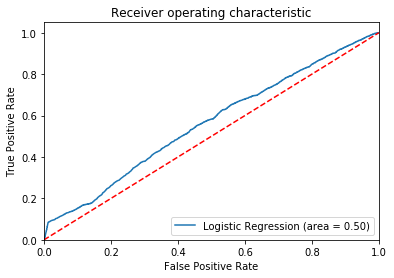

In [184]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 * La curva de la característica operativa del receptor (ROC) es otra herramienta común que se usa con los clasificadores binarios. La línea de puntos representa la curva ROC de un clasificador puramente aleatorio; un buen clasificador se mantiene lo más alejado posible de esa línea (hacia la esquina superior izquierda).
